In [1]:
## importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## reading dataset
df1=pd.read_csv("Advertising.csv")

In [3]:
## first 5 lines
df1.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


<b>This dataset is about the amount spent for advertisement of the product in TV, radio and Newspaper. The total sales of that respective product is also given.<b>

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
Radio         200 non-null float64
Newspaper     200 non-null float64
Sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


#### Total rows = 200 and total 5 columns are there, where 'Unnamed: 0' is not relevant.

In [5]:
## checking for null values
df1.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

#### No Null values found.

<b>The first column is removed because it is just index and does not affect the data.<b>

In [6]:
df2=df1.drop('Unnamed: 0',axis=1)

In [7]:
## new dataframe
df2.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
## statistical overview of the dataset
df2.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


From above table we can say that :<br>
<ul>
    <li><b>Amount spent on advertising over TV is the largest.</b></li>
    <li><b>More money is spent over advertising via newspaper than radio.</b></li>
    <li><b>The average of sales is small with respect to advertising cost.</b></li>
</ul>

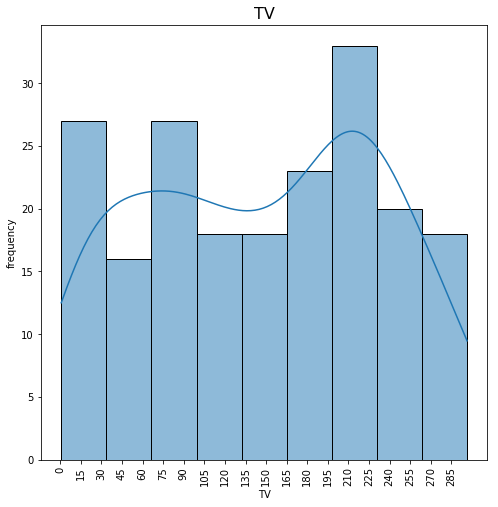

In [9]:
## distribution of TV advertisement cost
plt.figure(figsize=(8,8))
sns.histplot(data=df1, x="TV",kde=True)
plt.title("TV",fontsize=16)
plt.xlabel("TV")
plt.ylabel("frequency")
plt.xticks(np.arange(0,296,15))
plt.xticks(rotation=90)
plt.show()

<b> Not normally distributed </b>

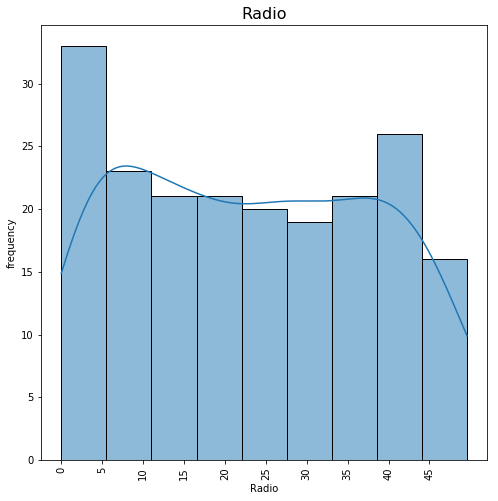

In [10]:
## distribution of Radio advertisement cost
plt.figure(figsize=(8,8))
sns.histplot(data=df1, x="Radio",kde=True)
plt.title("Radio",fontsize=16)
plt.xlabel("Radio")
plt.ylabel("frequency")
plt.xticks(np.arange(0,49,5))
plt.xticks(rotation=90)
plt.show()

<b> Not normally distributed </b>

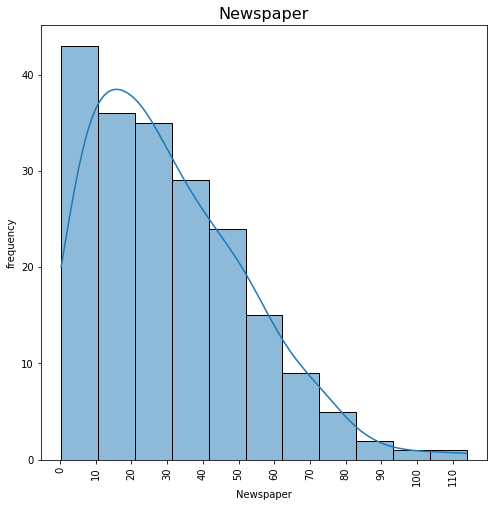

In [11]:
## distribution of Newspaper advertisement cost
plt.figure(figsize=(8,8))
sns.histplot(data=df1, x="Newspaper", kde=True)
plt.title("Newspaper",fontsize=16)
plt.xlabel("Newspaper")
plt.ylabel("frequency")
plt.xticks(np.arange(0,115,10))
plt.xticks(rotation=90)
plt.show()

<b> Positive skewness observed </b>

Text(0.5, 0, 'Modes')

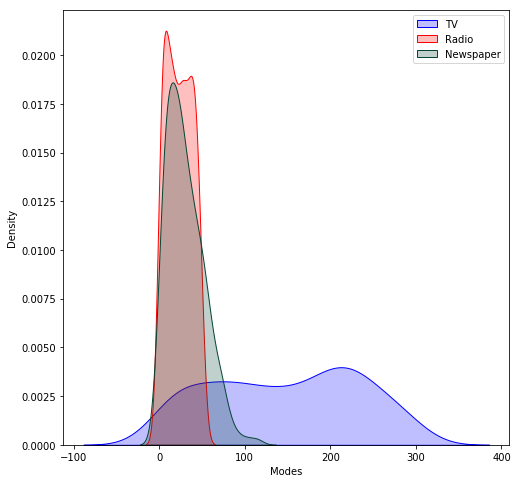

In [12]:
## kde graph
plt.figure(figsize=(8,8))
sns.kdeplot(df1['TV'], color='b', shade=True, Label='TV')
sns.kdeplot(df1['Radio'], color='r', shade=True, Label='Radio')
sns.kdeplot(df1['Newspaper'], color='#064635', shade=True, Label='Newspaper')
plt.legend()
plt.xlabel('Modes')

<b> Null hypothesis : Same amount is spent for the three advertisements.</b><br>
<b> Alternate hypothesis : Different amount is spent for the three advertisements.</b><br>
<b> Alpha = 0.05 </b>

In [13]:
## Shapiro-Wilk test can be used to check the normal distribution of residuals. 
## Null hypothesis : data is drawn from normal distribution.
import scipy.stats as stats
w, pvalue = stats.shapiro(df1[['TV','Radio','Newspaper']])
pvalue

7.083508946439276e-29

<b>7.083508946439276e-29 < 0.05 , therefore null hypothesis is rejected and data is not in normal distribution. </b>

In [14]:
## Levene’s test can be used to check the Homogeneity of variances when the data is not drawn from normal distribution.
## Null hypothesis : Variables are homogeneous.
from scipy.stats import levene
levene(df1['TV'], df1['Radio'], df1['Newspaper'])

LeveneResult(statistic=367.7289457873527, pvalue=8.303670138778167e-105)

<b>8.303670138778167e-105 < 0.05, therefore null hypothesis is rejected and data is not homogeneous. </b>

In [15]:
## anova F and P value using f_oneway
import scipy.stats as stats
fvalue, pvalue = stats.f_oneway(df1['TV'], df1['Radio'], df1['Newspaper'])
print(fvalue, pvalue)

358.8514595342597 4.552931539744962e-103


In [16]:
## Since the data is not homogenous and not normally distributed kruskal test is used
from scipy.stats import kruskal
kruskal(df1['TV'], df1['Radio'], df1['Newspaper'])

KruskalResult(statistic=257.66637166931656, pvalue=1.1180424828789922e-56)

#### 1.1180424828789922e-56 < 0.05 therefore the alternative hypothesis is accepted.  Different amount is spent for the three advertisements.